<a href="https://colab.research.google.com/github/falmeidadev/tcc-pucminas2023/blob/main/PREVIS%C3%83O_DE_PRE%C3%87OS_DE_A%C3%87%C3%95ES_COM_SERIES_TEMPORAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das Bibliotecas para manipulação de dados

In [135]:
#Importando bibliotecas para manipulação da dados e plotagem de gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#Importando biblioteca para busca de base de dados online
import pandas_datareader.data as web

#Importando a biblioteca do Yahoo! Finance
import yfinance as yf
yf.pdr_override()

from statsmodels.tsa.seasonal import seasonal_decompose

In [136]:
#Instalando a biblioteca ARIMA
!pip install pmdarima

In [137]:
#Importando a biblioteca ARIMA
from pmdarima.arima import auto_arima


Carregando a base de dados

In [138]:
#Criação das variáveis
ticker = 'BOVA11.SA'
startday = "2016-01-01"
endday = "2022-12-31"

#Carregando a base de dados para o dataset
dataset = web.get_data_yahoo(ticker, start=startday, end=endday)

[*********************100%%**********************]  1 of 1 completed


In [139]:
#Excluindo do dataset os atributos que não serão utilizados pelo modelo ARIMA e Prophet
dataset.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace = True)

Exploração dos Dados

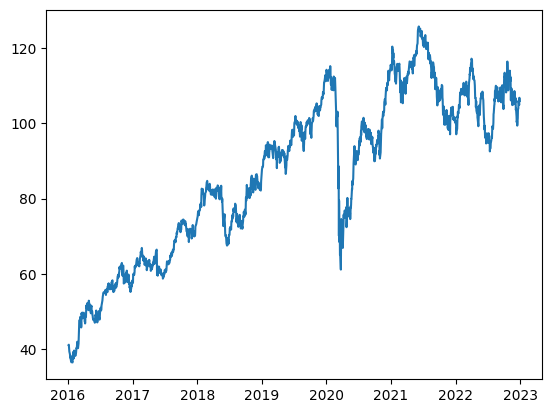

In [140]:
#Plotagem do gráfico da série temporal
plt.plot(dataset)

Decomposição da série temporal

In [141]:
decomposicao = seasonal_decompose(dataset, period=len(dataset) // 2)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal

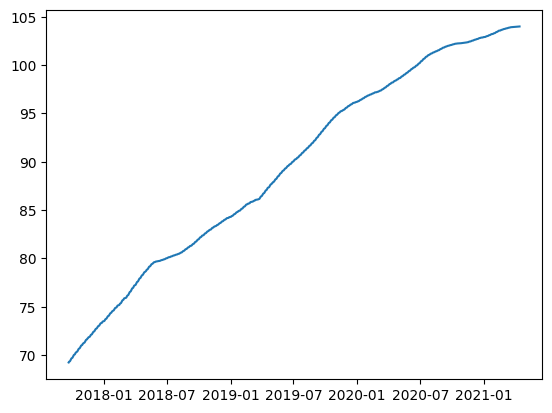

In [142]:
plt.plot(tendencia)

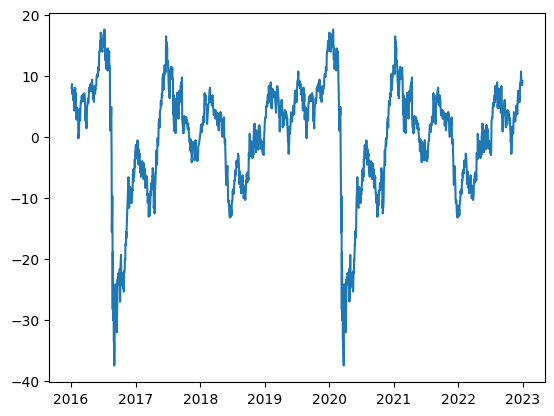

In [143]:
plt.plot(sazonal)

Previsões com ARIMA

In [144]:
#Criação dos datasets de treinamento e teste
treinamento = dataset[:1626]
teste = dataset[1626:]

In [145]:
#Treinando o modelo
modelo = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [146]:
previsoes = modelo.predict(n_periods=90)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Graficos das Previsões

In [147]:
previsoes.index = teste.index
previsoes_preco = pd.DataFrame(previsoes, index=teste.index, columns = ['previsoes'])
pd.concat([teste, previsoes_preco], axis=1)

,Adj Close,previsoes
Date,,
2022-08-22,106.730003,107.832160
2022-08-23,109.099998,108.072182
2022-08-24,109.180000,108.040319
2022-08-25,109.599998,108.219164
2022-08-26,108.360001,108.040021
...,...,...
2022-12-23,106.000000,107.399832
2022-12-26,105.150002,107.399822
2022-12-27,104.900002,107.399815


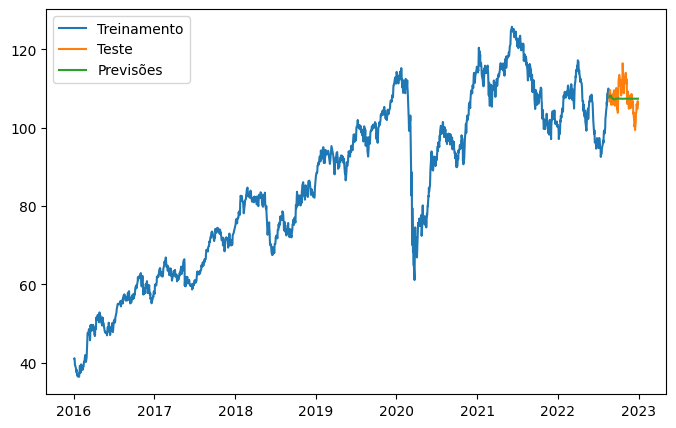

In [148]:
#Plotando a previsão para os proximos 90 dias
plt.figure(figsize=(8,5))
plt.plot(treinamento, label='Treinamento')
plt.plot(teste, label='Teste')
plt.plot(previsoes_preco, label='Previsões')
plt.legend()

<Axes: xlabel='Date'>

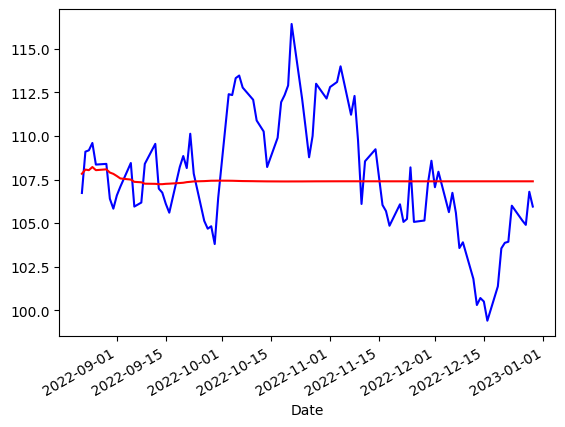

In [149]:
#Cruzando os graficos de Teste e Previsão
teste['Adj Close'].plot(color='blue')
previsoes_preco['previsoes'].plot(color='red')

Avaliação das Previsões

In [150]:
#Calcula a média da diferença entre o valor real e o valor da previsão
from sklearn.metrics import mean_absolute_error
mean_absolute_error(teste, previsoes_preco)

2.781790327722915

Instalação e Importação das Bibliotecas

In [151]:
#Instalando o modelo Prophet
!pip install prophet

In [152]:
#Importando o modelo Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Carregamento da Base de Dados

In [153]:
#Carregando o dataset
ticker = 'BOVA11.SA'
startday = "2016-01-01"
endday = "2022-12-31"

dataset = web.get_data_yahoo(ticker, start=startday, end=endday)

[*********************100%%**********************]  1 of 1 completed


In [154]:
#Excluindo os campos não utilizados pelo modelo Prophet do dataset
dataset.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace = True)

In [155]:
#retirando o indice do campo Date
dataset.reset_index(inplace = True)

In [156]:
#Renomeando os atributos Date e Adj Close para ds e y respectivamente, que é um requisito do modelo Prophet
dataset.rename(columns = {'Date': 'ds', 'Adj Close': 'y'}, inplace = True)

Previsões com Prophet

In [157]:
#Criação do dataset de treinamento e teste
treinamento = dataset[:1626]
teste = dataset[1626:]

In [158]:
#Treinamento do modelo
modelo = Prophet()
modelo.fit(treinamento)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1o3dsl2f/c_foemrm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1o3dsl2f/vg51l2rs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2170', 'data', 'file=/tmp/tmp1o3dsl2f/c_foemrm.json', 'init=/tmp/tmp1o3dsl2f/vg51l2rs.json', 'output', 'file=/tmp/tmp1o3dsl2f/prophet_model6pyuog0i/prophet_model-20231121135844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [159]:
#Fazendo a previsão com os dados de teste
previsoes = modelo.predict(teste)

Gráficos das Previsões

In [160]:
previsoes = previsoes[['ds', 'yhat']]
previsoes.set_index('ds', inplace = True)
treinamento.set_index('ds', inplace = True)
teste.set_index('ds', inplace = True)
previsoes.index = teste.index
previsoes_preco = pd.DataFrame(previsoes, index=teste.index)
previsoes_preco.rename(columns = {'yhat': 'previsoes'}, inplace = True)
pd.concat([teste, previsoes_preco], axis=1)

,y,previsoes
ds,,
2022-08-22,106.730003,98.443837
2022-08-23,109.099998,98.318412
2022-08-24,109.180000,98.207044
2022-08-25,109.599998,97.970632
2022-08-26,108.360001,97.953066
...,...,...
2022-12-23,106.000000,94.325272
2022-12-26,105.150002,94.466048
2022-12-27,104.900002,94.587779


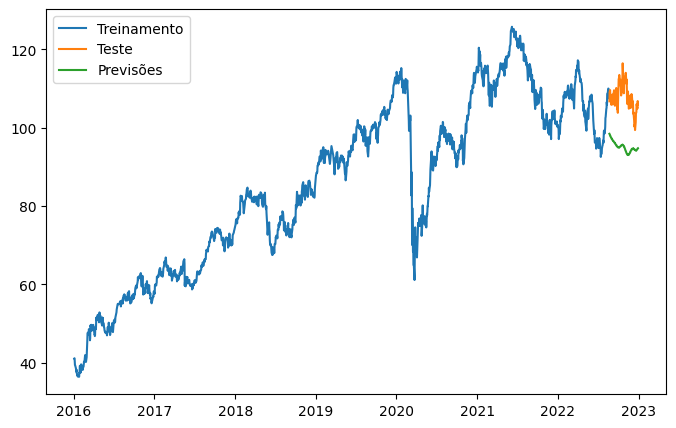

In [161]:
#Plotando a previsão para os proximos 90 dias
plt.figure(figsize=(8,5))
plt.plot(treinamento, label='Treinamento')
plt.plot(teste, label='Teste')
plt.plot(previsoes_preco, label='Previsões')
plt.legend()

<Axes: xlabel='ds'>

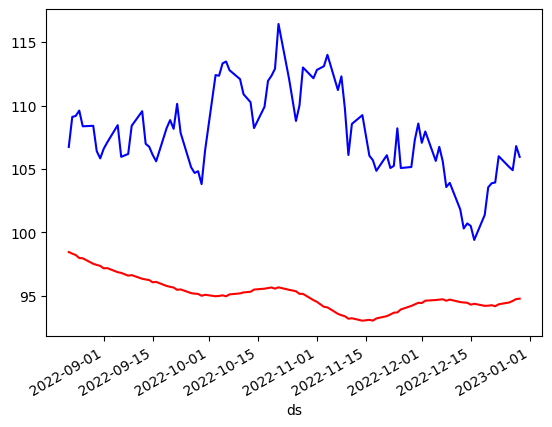

In [162]:
#Cruzando os graficos de Teste e Previsão
teste['y'].plot(color='blue')
previsoes_preco['previsoes'].plot(color='red')

Avaliação das Previsões

In [163]:
#Calcula a média da diferença entre o valor real e o valor da previsão
mean_absolute_error(teste['y'], previsoes_preco)

12.582457542646054